In [1]:
pip install yfinance pandas numpy matplotlib scipy tensorflow scikit-learn


In [4]:
data = yf.download(tickers, start=start_date, end=end_date)
print(data.columns)


[*********************100%***********************]  2 of 2 completed

MultiIndex([( 'Close', 'BPCL.NS'),
            ( 'Close',  'IOC.NS'),
            (  'High', 'BPCL.NS'),
            (  'High',  'IOC.NS'),
            (   'Low', 'BPCL.NS'),
            (   'Low',  'IOC.NS'),
            (  'Open', 'BPCL.NS'),
            (  'Open',  'IOC.NS'),
            ('Volume', 'BPCL.NS'),
            ('Volume',  'IOC.NS')],
           names=['Price', 'Ticker'])


In [5]:
print(data.head())
print(data.info())


Price           Close                  High                   Low             \
Ticker        BPCL.NS     IOC.NS    BPCL.NS     IOC.NS    BPCL.NS     IOC.NS   
Date                                                                           
2015-01-01  60.191418  30.368473  60.495045  30.585099  59.087326  29.853982   
2015-01-02  59.289761  30.201488  60.347848  30.639257  59.110343  30.124766   
2015-01-05  59.404781  30.526426  59.754414  30.860395  59.004549  30.138304   
2015-01-06  58.806713  30.187950  60.292637  30.747573  57.964842  29.939732   
2015-01-07  59.340363  30.242105  59.745194  30.472272  58.608899  29.750181   

Price            Open               Volume           
Ticker        BPCL.NS     IOC.NS   BPCL.NS   IOC.NS  
Date                                                 
2015-01-01  59.703778  30.034505   2893002  2369712  
2015-01-02  59.887808  30.503865   6142290  2576334  
2015-01-05  59.344978  30.269182   6566232  3609636  
2015-01-06  60.025812  30.643771  1

In [6]:
data = yf.download(tickers, start=start_date, end=end_date)


[*********************100%***********************]  2 of 2 completed


In [8]:
import yfinance as yf
import pandas as pd

tickers = ["IOC.NS", "BPCL.NS"]  # Example Indian tickers
df_all = yf.download(tickers, start="2015-01-01", end="2023-01-01")

print(df_all.columns)       # Print all columns
print(df_all.head())        # Look at the first few rows
print(df_all.tail())        # Look at the last few rows



[*********************100%***********************]  2 of 2 completed

MultiIndex([( 'Close', 'BPCL.NS'),
            ( 'Close',  'IOC.NS'),
            (  'High', 'BPCL.NS'),
            (  'High',  'IOC.NS'),
            (   'Low', 'BPCL.NS'),
            (   'Low',  'IOC.NS'),
            (  'Open', 'BPCL.NS'),
            (  'Open',  'IOC.NS'),
            ('Volume', 'BPCL.NS'),
            ('Volume',  'IOC.NS')],
           names=['Price', 'Ticker'])
Price           Close                  High                   Low             \
Ticker        BPCL.NS     IOC.NS    BPCL.NS     IOC.NS    BPCL.NS     IOC.NS   
Date                                                                           
2015-01-01  60.191418  30.368473  60.495045  30.585099  59.087326  29.853982   
2015-01-02  59.289761  30.201488  60.347848  30.639257  59.110343  30.124766   
2015-01-05  59.404781  30.526426  59.754414  30.860395  59.004549  30.138304   
2015-01-06  58.806713  30.187950  60.292637  30.747573  57.964842  29.939732   
2015-01-07  59.340363  30.242105  59.745194  30.472

In [9]:
# If there's no "Adj Close", try "Close"
df_close = df_all["Close"]
df_close.dropna(inplace=True)

print(df_close.head())


Ticker        BPCL.NS     IOC.NS
Date                            
2015-01-01  60.191418  30.368473
2015-01-02  59.289761  30.201488
2015-01-05  59.404781  30.526426
2015-01-06  58.806713  30.187950
2015-01-07  59.340363  30.242105


<ipython-input-9-592b54156abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.dropna(inplace=True)


In [11]:
df_one_ticker = yf.download("IOC.NS", start="2015-01-01", end="2023-01-01")

# If you see "Close" but not "Adj Close", rename:
df_one_ticker.rename(columns={"Close": "IOC_Close"}, inplace=True)

print(df_one_ticker.head())



[*********************100%***********************]  1 of 1 completed

Price       IOC_Close       High        Low       Open   Volume
Ticker         IOC.NS     IOC.NS     IOC.NS     IOC.NS   IOC.NS
Date                                                           
2015-01-01  30.368473  30.585099  29.853982  30.034505  2369712
2015-01-02  30.201488  30.639257  30.124766  30.503865  2576334
2015-01-05  30.526426  30.860395  30.138304  30.269182  3609636
2015-01-06  30.187950  30.747573  29.939732  30.643771  6695466
2015-01-07  30.242105  30.472272  29.750181  30.156357  5033676


In [12]:
import yfinance as yf
import pandas as pd

tickers = ["IOC.NS", "BPCL.NS"]
df_all = yf.download(tickers, start="2015-01-01", end="2023-01-01")

# If you have a multi-index, df_all.columns.levels[0] might look like
# ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# 1) Check if 'Adj Close' is in the first level of columns
if "Adj Close" in df_all.columns.levels[0]:
    data = df_all["Adj Close"].dropna()
else:
    # Fallback to 'Close' if 'Adj Close' doesn't exist
    data = df_all["Close"].dropna()

print(data.head())


[*********************100%***********************]  2 of 2 completed

Ticker        BPCL.NS     IOC.NS
Date                            
2015-01-01  60.191418  30.368473
2015-01-02  59.289761  30.201488
2015-01-05  59.404781  30.526426
2015-01-06  58.806713  30.187950
2015-01-07  59.340363  30.242105


[*********************100%***********************]  2 of 2 completed


Data Columns: Index(['BPCL.NS', 'IOC.NS'], dtype='object', name='Ticker')
Ticker        BPCL.NS     IOC.NS
Date                            
2015-01-01  60.191418  30.368473
2015-01-02  59.289761  30.201488
2015-01-05  59.404781  30.526426
2015-01-06  58.806713  30.187950
2015-01-07  59.340363  30.242105


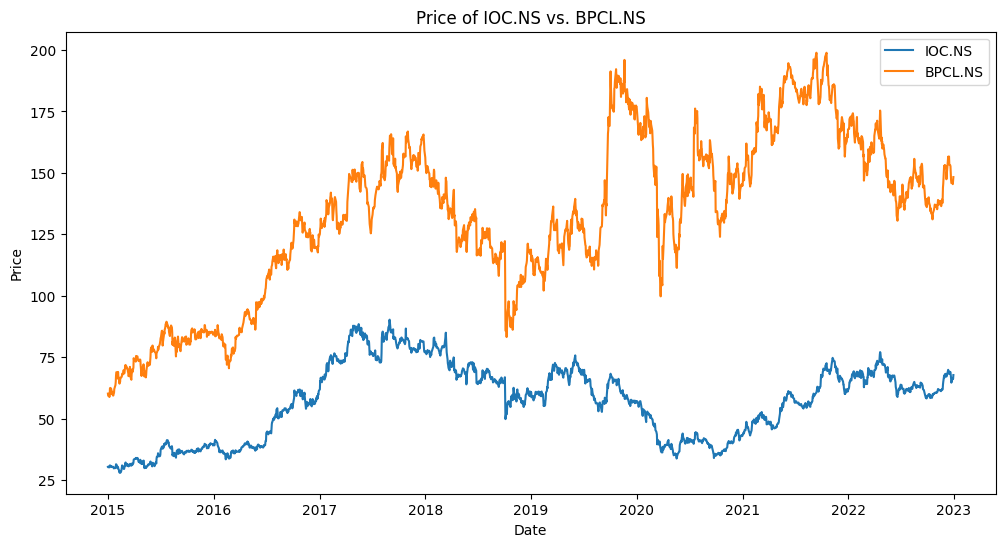

Correlation between IOC.NS and BPCL.NS: 0.5453
Cointegration test p-value: 0.8233029728045476
Hedge ratio (beta): 0.25258008861174375


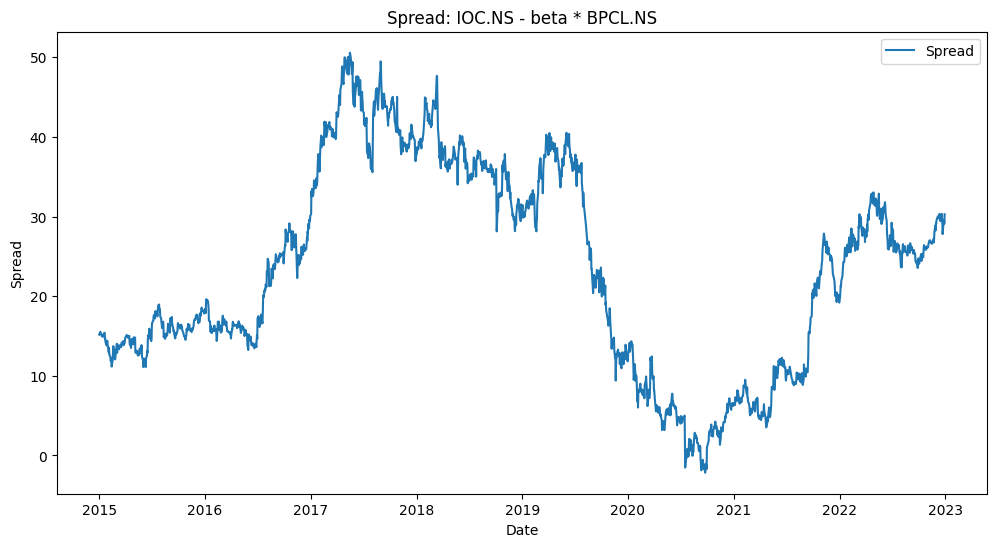

ADF Statistic: -1.3206750338149478
ADF p-value: 0.6196611852833983


<ipython-input-14-e9cbe6e93dec>:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['signal'] = data['signal'].replace(to_replace=0, method='ffill')


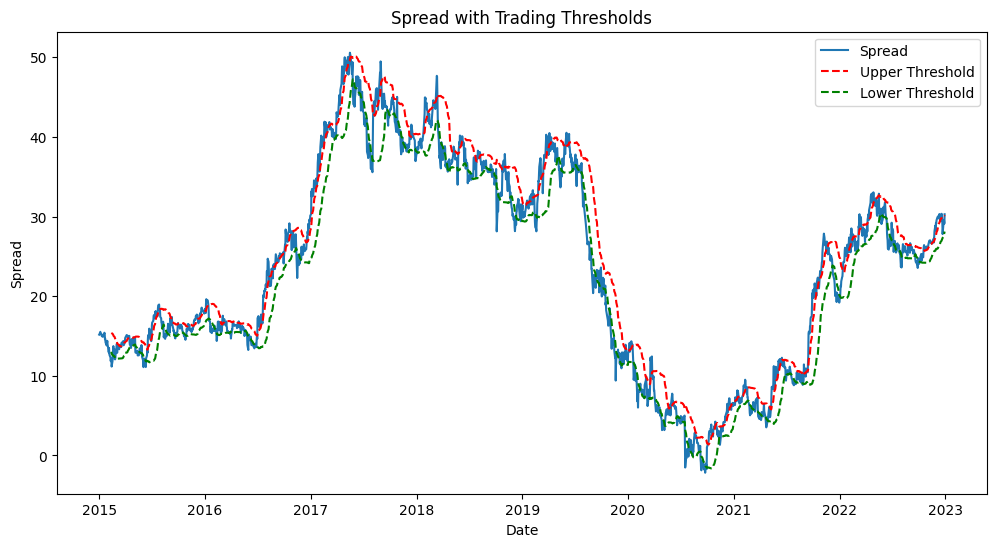

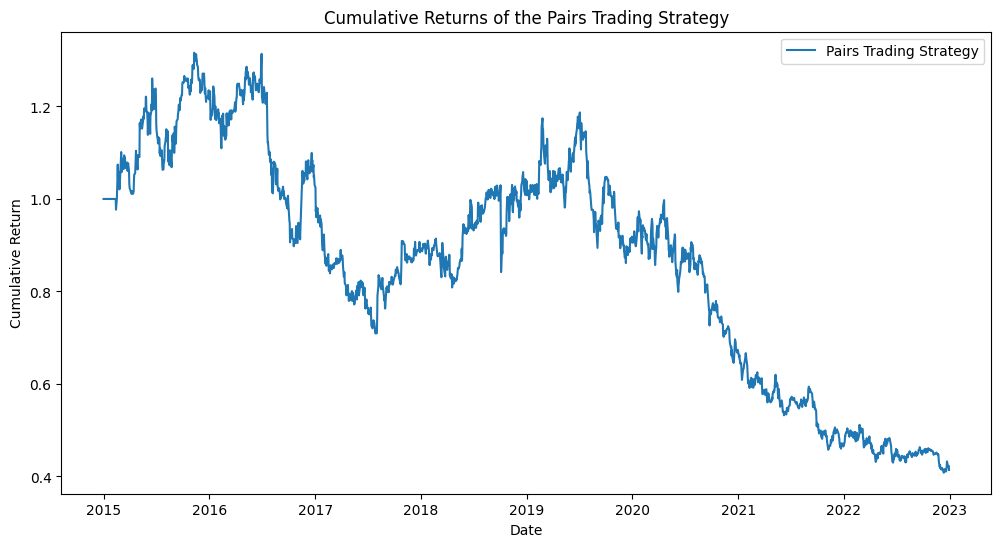

Annualized Sharpe Ratio: -0.3163
Maximum Drawdown: -69.00%


In [14]:
# ===========================================
# Complete Pairs Trading Strategy Code
# for Indian Energy Stocks (IOC.NS and BPCL.NS)
# ===========================================

# 1. Import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

# 2. Define tickers and date range
tickers = ["IOC.NS", "BPCL.NS"]
start_date = "2015-01-01"
end_date = "2023-01-01"

# 3. Download data using yfinance
df_all = yf.download(tickers, start=start_date, end=end_date)

# 4. Check for 'Adj Close'; if missing, use 'Close'
if "Adj Close" in df_all.columns.get_level_values(0):
    data = df_all["Adj Close"].dropna()
else:
    data = df_all["Close"].dropna()

# Verify the columns and a sample of the data
print("Data Columns:", data.columns)
print(data.head())

# 5. Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['IOC.NS'], label='IOC.NS')
plt.plot(data.index, data['BPCL.NS'], label='BPCL.NS')
plt.title('Price of IOC.NS vs. BPCL.NS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 6. Check the correlation between the stocks
correlation = data.corr().iloc[0, 1]
print(f"Correlation between IOC.NS and BPCL.NS: {correlation:.4f}")

# 7. Perform the cointegration test
score, pvalue, _ = coint(data['IOC.NS'], data['BPCL.NS'])
print("Cointegration test p-value:", pvalue)

# 8. If cointegration exists, determine the hedge ratio via linear regression
X = sm.add_constant(data['BPCL.NS'])
y = data['IOC.NS']
model = sm.OLS(y, X).fit()
beta = model.params['BPCL.NS']
print("Hedge ratio (beta):", beta)

# 9. Calculate the spread
data['spread'] = data['IOC.NS'] - beta * data['BPCL.NS']

# Plot the spread
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['spread'], label='Spread')
plt.title('Spread: IOC.NS - beta * BPCL.NS')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

# 10. Check stationarity of the spread using ADF test
adf_result = adfuller(data['spread'])
print("ADF Statistic:", adf_result[0])
print("ADF p-value:", adf_result[1])

# 11. Generate trading signals based on a 30-day rolling mean and standard deviation
window = 30
data['spread_mean'] = data['spread'].rolling(window=window).mean()
data['spread_std'] = data['spread'].rolling(window=window).std()

# Define thresholds: one standard deviation away from the mean
data['upper_threshold'] = data['spread_mean'] + data['spread_std']
data['lower_threshold'] = data['spread_mean'] - data['spread_std']

def get_signal(row):
    if row['spread'] > row['upper_threshold']:
        return -1  # Signal to short the spread (short IOC.NS, long BPCL.NS)
    elif row['spread'] < row['lower_threshold']:
        return 1   # Signal to long the spread (long IOC.NS, short BPCL.NS)
    else:
        return 0

data['signal'] = data.apply(get_signal, axis=1)

# Carry the last signal forward (i.e. maintain position until a reversal)
data['signal'] = data['signal'].replace(to_replace=0, method='ffill')

# Plot spread with thresholds and signals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['spread'], label='Spread')
plt.plot(data.index, data['upper_threshold'], 'r--', label='Upper Threshold')
plt.plot(data.index, data['lower_threshold'], 'g--', label='Lower Threshold')
plt.title('Spread with Trading Thresholds')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

# 12. Backtest the strategy
# Calculate daily percentage returns for each stock
data['IOC_returns'] = data['IOC.NS'].pct_change()
data['BPCL_returns'] = data['BPCL.NS'].pct_change()

# Strategy return:
# If signal = +1, then: long IOC.NS and short BPCL.NS (scaled by beta)
# If signal = -1, then: short IOC.NS and long BPCL.NS
data['strategy_return'] = data['signal'].shift(1) * (data['IOC_returns'] - beta * data['BPCL_returns'])

# Calculate cumulative returns of the strategy
data['cumulative_return'] = (1 + data['strategy_return'].fillna(0)).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['cumulative_return'], label='Pairs Trading Strategy')
plt.title('Cumulative Returns of the Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# 13. Performance Evaluation
# Annualized Sharpe Ratio (assuming 252 trading days per year)
strategy_returns = data['strategy_return'].dropna()
annualized_sharpe = np.sqrt(252) * strategy_returns.mean() / strategy_returns.std()
print(f"Annualized Sharpe Ratio: {annualized_sharpe:.4f}")

# Maximum Drawdown Calculation
data['running_max'] = data['cumulative_return'].cummax()
data['drawdown'] = (data['cumulative_return'] - data['running_max']) / data['running_max']
max_drawdown = data['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")


